<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Item Code      251 non-null    int64 
 1   Item Name      251 non-null    object
 2   Category Code  251 non-null    int64 
 3   Category Name  251 non-null    object
dtypes: int64(2), object(2)
memory usage: 8.0+ KB
Dataset Overview:
 None

First 5 Rows:
          Item Code              Item Name  Category Code  \
0  102900005115168       Niushou Shengcai     1011010101   
1  102900005115199      Sichuan Red Cedar     1011010101   
2  102900005115625  Local Xiaomao Cabbage     1011010101   
3  102900005115748           White Caitai     1011010101   
4  102900005115762               Amaranth     1011010101   

            Category Name  
0  Flower/Leaf Vegetables  
1  Flower/Leaf Vegetables  
2  Flower/Leaf Vegetables  
3  Flower/Leaf Vegetables  
4  Flower/Leaf Vegetables  

Category Distribut

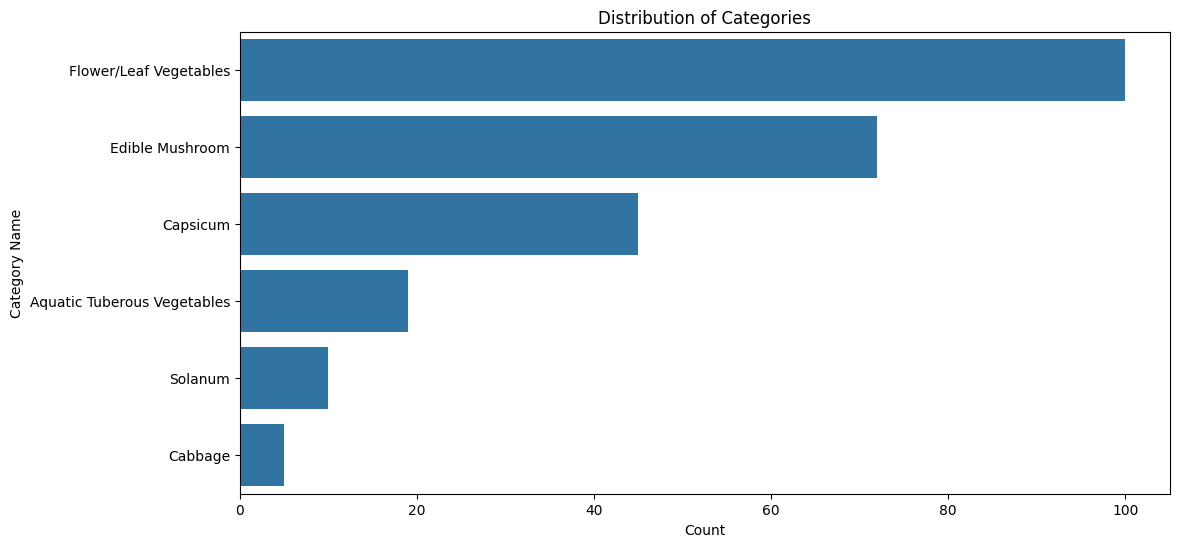

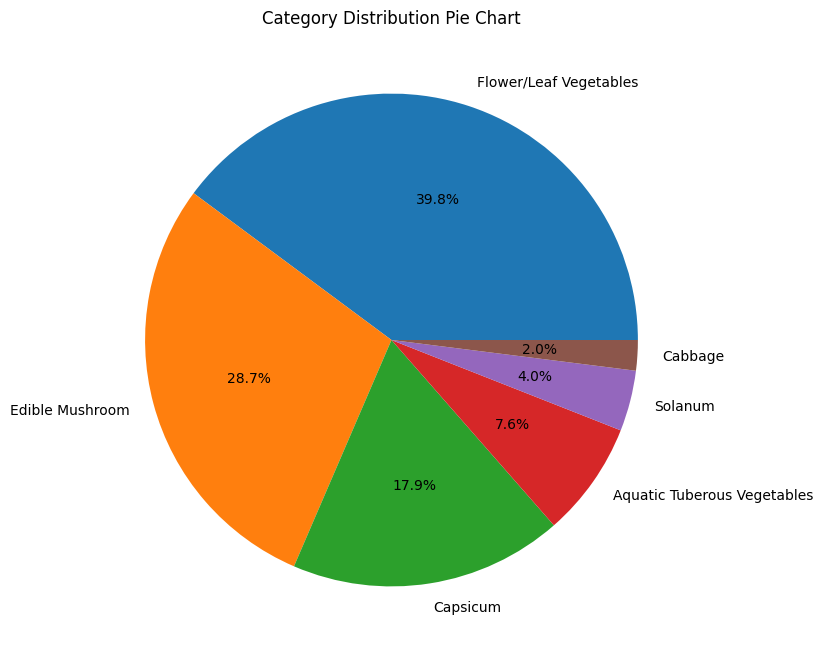


Cluster Assignment:
             Category Name  Cluster
0  Flower/Leaf Vegetables        0
1  Flower/Leaf Vegetables        0
2  Flower/Leaf Vegetables        0
3  Flower/Leaf Vegetables        0
4  Flower/Leaf Vegetables        0
5  Flower/Leaf Vegetables        0
6  Flower/Leaf Vegetables        0
7  Flower/Leaf Vegetables        0
8  Flower/Leaf Vegetables        0
9  Flower/Leaf Vegetables        0


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "annex1.csv"
df = pd.read_csv(file_path);

# Data Cleaning
# Remove duplicates
df = df.drop_duplicates()

# Standardize text columns
df['Item Name'] = df['Item Name'].str.strip().str.title()
df['Category Name'] = df['Category Name'].str.strip().str.title()

# Summary Statistics
print("Dataset Overview:\n", df.info())
print("\nFirst 5 Rows:\n", df.head())
print("\nCategory Distribution:\n", df['Category Name'].value_counts())

# Data Visualization
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Category Name'], order=df['Category Name'].value_counts().index)
plt.title("Distribution of Categories")
plt.xlabel("Count")
plt.ylabel("Category Name")
plt.show()

# Pie Chart of Category Distribution
df['Category Name'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title("Category Distribution Pie Chart")
plt.ylabel("")
plt.show()

# Machine Learning Example: Clustering
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# Encode categorical features
label_encoder = LabelEncoder()
df['Category Code Encoded'] = label_encoder.fit_transform(df['Category Name'])

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Category Code Encoded']])

# Display Clustering Result
print("\nCluster Assignment:\n", df[['Category Name', 'Cluster']].head(10))
